# Práctica: Modelos poblacionales discretos


## Efecto Allee

### Discusión ecológica

El **efecto Allee** describe situaciones donde las poblaciones con pocos individuos tienen dificultades para reproducirse o sobrevivir.

Esto puede ocurrir por:
- **Falta de parejas** (difícil encontrar compañero).
- **Falta de cooperación** (caza o defensa en grupo).
- **Pérdida de diversidad genética** (mayor endogamia).
- **Polinización ineficiente** (plantas dispersas).

Ejemplos de especies con efecto Allee: mamíferos grandes, aves carroñeras o especies insulares con baja densidad.

Cuando la densidad es baja, el crecimiento per cápita puede disminuir, lo que puede provocar **extinción incluso en ambientes favorables**.

### Modelos matemáticos

#### Efecto Allee fuerte (con umbral $A$):

$$
N_{t+1} = N_t + r\,N_t\left(1 - \frac{N_t}{K}\right)\left(\frac{N_t}{A} - 1\right),
$$

donde:
- $r$ es la tasa de crecimiento intrínseca,  
- $K$ es la capacidad de carga,  
- $A$ es el umbral de Allee.

Equilibrios: $N^* = 0$, $N^* = A$, $N^* = K$  
 $0$ y $K$ son **estables**, $A$ es **inestable**.

#### Efecto Allee débil:

$$
N_{t+1} = N_t + r\,N_t\left(1 - \frac{N_t}{K}\right)\left(\frac{N_t}{A + N_t}\right).
$$

Aquí no hay un umbral de extinción, pero el crecimiento es **muy bajo** cuando $N_t$ es pequeño.

### Preguntas de interpretación

1. ¿Qué ocurre si se inicia con $N_0 < A$ en el modelo fuerte?  
2. ¿Qué ocurre si se inicia con $N_0 > A$?  
3. ¿En el modelo débil, hay un umbral real?  
4. ¿Cómo cambia el destino de la población al variar $A$?  
5. ¿Por qué poblaciones muy pequeñas requieren manejo especial?

### Respuestas orientativas

1. Si $N_0 < A$, la población colapsa a 0.  
2. Si $N_0 > A$, crece hacia $K$.  
3. En el modelo débil, no hay umbral; el crecimiento es lento, pero positivo.  
4. Un $A$ mayor aumenta el riesgo de extinción.  
5. Debajo de $A$ la población decrece, por eso es necesario “empujarla” por encima del umbral mediante programas de conservación.

### Ejercicio 1.1

Verifica con graficas las respuestas anteriores. 

### Ejercicio 1.2

- Con $r=0.5,K=100,A=20$, simula el modelo fuerte desde $N_0=10$ y desde $N_0=40$ por 80 pasos. ¿Qué ocurre y por qué?
- Con los mismos $r,K,A$, compara trayectorias del modelo débil iniciando en $N_0=10$ y $N_0=40$. ¿Hay umbral real?
- En el modelo fuerte, fija $r=0.5,K=100$ y varia $A\in\{5,20,60\}$. ¿Cómo cambia el destino desde $N_0=30$?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def iterar_dinamica(f_actualizacion, x0, pasos, **parametros):
    """
    Itera la ecuación en diferencias:
        x_{t+1} = f_actualizacion(x_t, **parametros)
    - f_actualizacion: función que recibe x_t y parámetros, y devuelve x_{t+1}
    - x0: estado inicial (>=0)
    - pasos: número de iteraciones (entero)
    Devuelve: np.ndarray con la serie (longitud pasos+1).
    (Se trunca a 0 si aparece un valor negativo por redondeos/ruido numérico.)
    """
    x = np.empty(pasos + 1, dtype=float)
    x[0] = float(x0)
    for t in range(pasos):
        x[t+1] = max(0.0, float(f_actualizacion(x[t], **parametros)))
    return x

def graficar_serie(serie, titulo=None, equilibrios=None, etiqueta='N_t'):
    """
    Grafica una serie temporal discreta.
    - equilibrios: valor o lista de valores para dibujar líneas horizontales.
    """
    plt.figure()
    plt.plot(serie, marker='o', linewidth=1)
    if equilibrios is not None:
        for e in np.atleast_1d(equilibrios):
            plt.axhline(float(e), linestyle='--', linewidth=1)
    plt.xlabel('tiempo t')
    plt.ylabel(etiqueta)
    if titulo:
        plt.title(titulo)
    plt.tight_layout()
    plt.show()


In [2]:
def siguiente_allee_fuerte(N, r, K, A):
    """Efecto Allee fuerte con umbral A."""
    return N + r * N * (1 - N / K) * (N / A - 1)

def siguiente_allee_debil(N, r, K, A):
    """Efecto Allee débil (crecimiento positivo pero pequeño a bajas densidades)."""
    return N + r * N * (1 - N / K) * (N / (A + N))


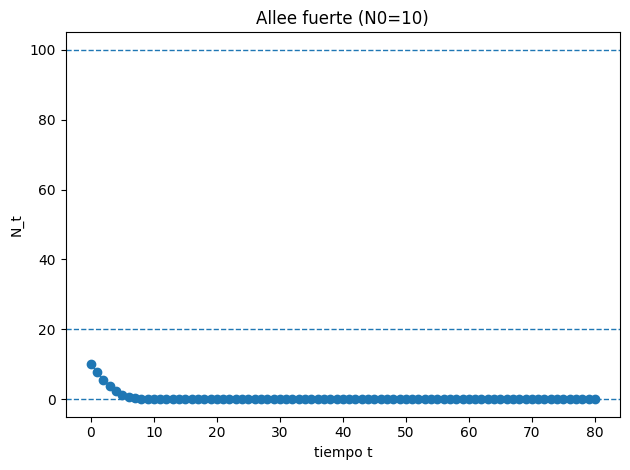

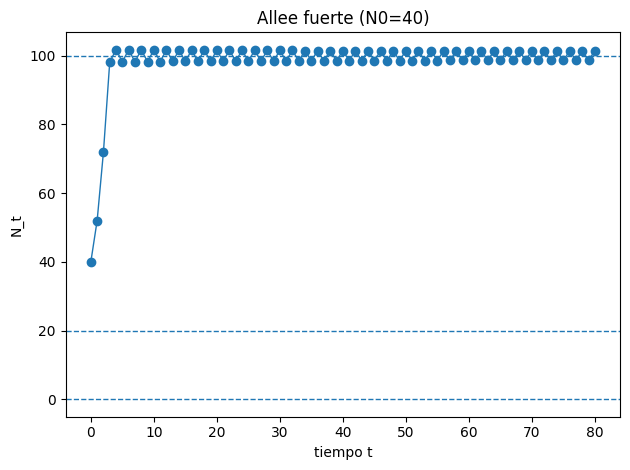

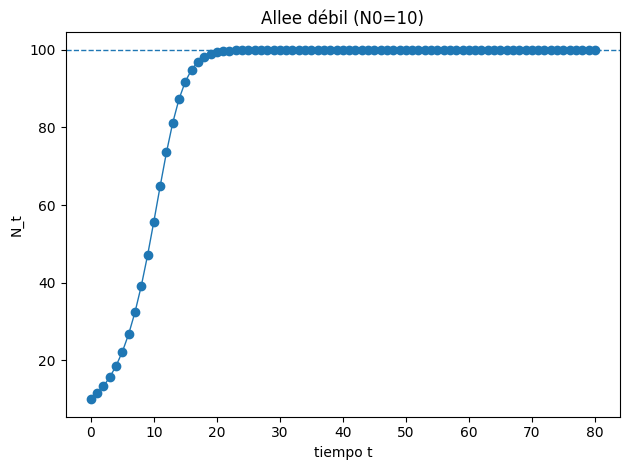

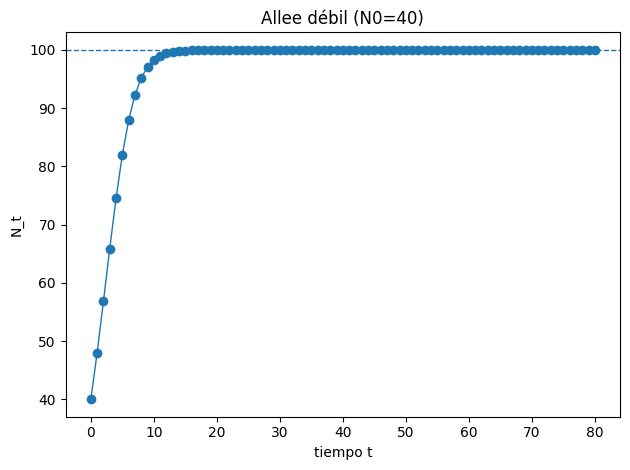

In [3]:
# Fuerte
serie_fuerte_10 = iterar_dinamica(siguiente_allee_fuerte, x0=10, pasos=80, r=0.5, K=100, A=20)
serie_fuerte_40 = iterar_dinamica(siguiente_allee_fuerte, x0=40, pasos=80, r=0.5, K=100, A=20)
graficar_serie(serie_fuerte_10, "Allee fuerte (N0=10)", equilibrios=[0,20,100])
graficar_serie(serie_fuerte_40, "Allee fuerte (N0=40)", equilibrios=[0,20,100])

# Débil
serie_debil_10 = iterar_dinamica(siguiente_allee_debil, x0=10, pasos=80, r=0.5, K=100, A=20)
serie_debil_40 = iterar_dinamica(siguiente_allee_debil, x0=40, pasos=80, r=0.5, K=100, A=20)
graficar_serie(serie_debil_10, "Allee débil (N0=10)", equilibrios=[100])
graficar_serie(serie_debil_40, "Allee débil (N0=40)", equilibrios=[100])


## Modelos de pesca

### Discusión ecológica

La **pesca o recolección** introduce una pérdida artificial a la dinámica poblacional.  
Si la extracción es excesiva, puede producir **colapsos** irreversibles.

Dos tipos básicos de cosecha:

1. **Cosecha constante ($H$):** se extrae una cantidad fija cada periodo.  
2. **Cosecha proporcional ($h$):** se extrae una fracción del stock.


### Modelos matemáticos

#### Cosecha constante:

$$
N_{t+1} = N_t + r\,N_t\left(1 - \frac{N_t}{K}\right) - H.
$$

Existen equilibrios positivos si $H \le \frac{rK}{4}$.  
Si $H$ supera ese valor crítico, la población colapsa.


#### Cosecha proporcional:

$$
N_{t+1} = N_t + r\,N_t\left(1 - \frac{N_t}{K}\right) - h N_t.
$$

El equilibrio positivo es:

$$
N^* = K\left(1 - \frac{h}{r}\right), \quad \text{válido si } h < r.
$$

Cuando $h \to r$, el equilibrio desaparece y la población se extingue.


### Preguntas de interpretación

1. ¿Qué ocurre al aumentar $H$ en la cosecha constante?  
2. ¿Cuál es el valor máximo de $H$ que permite equilibrio positivo?  
3. ¿Qué sucede cuando $h \to r$ en la cosecha proporcional?  
4. ¿Qué tipo de cosecha es más segura ecológicamente?  
5. ¿Por qué el modelo proporcional se considera más “resiliente”?


### Respuestas orientativas

1. Si $H$ aumenta, el equilibrio positivo disminuye hasta desaparecer (colapso).  
2. El máximo sostenible es $H_{\max} = \frac{rK}{4}$.  
3. Cuando $h = r$, la población colapsa.  
4. La cosecha proporcional es más segura porque la extracción baja si la población cae.  
5. Es más resiliente porque ajusta automáticamente la tasa de extracción a la abundancia.


### Ejercicio 2.1

Verifica con graficas las respuestas anteriores. 

### Ejercicio 2.2

- Con $r=1,K=100$ simula para $H\in\{10,20,30\}$ desde $N_0=80$. ¿Para cuáles $H$ hay colapso?
- Fija $r=0.6,K=100$ . Compara $H=20$ (constante) con $h=0.2$ (proporcional), ambos desde $N_0=50$. ¿Cuál es más robusto ante una caída inicial a $N_0=15$?



In [4]:
def siguiente_pesca_cosecha_constante(N, r, K, H):
    """Logístico discreto con cosecha constante H."""
    return N + r * N * (1 - N / K) - H

def siguiente_pesca_cosecha_proporcional(N, r, K, h):
    """Logístico discreto con cosecha proporcional h."""
    return N + r * N * (1 - N / K) - h * N

# Ayudas para equilibrios
def equilibrios_pesca_cosecha_constante(r, K, H):
    """
    Resuelve r N (1 - N/K) = H  -> (r/K) N^2 - r N + H = 0
    Devuelve (N1, N2) ordenados si hay soluciones reales; si no, tuple().
    """
    a = r / K
    b = -r
    c = H
    D = b*b - 4*a*c
    if D < 0:
        return tuple()
    raiz = D**0.5
    N1 = (-b - raiz) / (2*a)
    N2 = (-b + raiz) / (2*a)
    return (min(N1, N2), max(N1, N2))

def equilibrio_pesca_cosecha_proporcional(r, K, h):
    """Equilibrio positivo: K (1 - h/r) si h<r; si no, solo 0."""
    return (0.0 if h >= r else K * (1 - h / r))


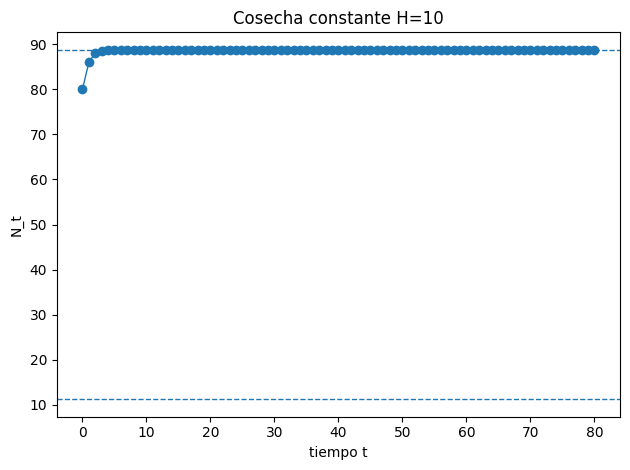

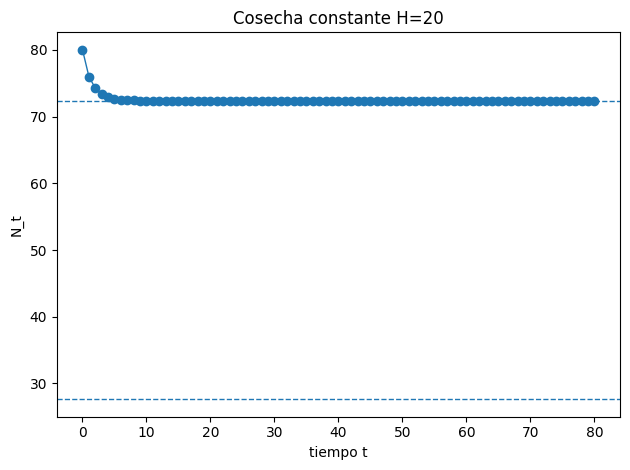

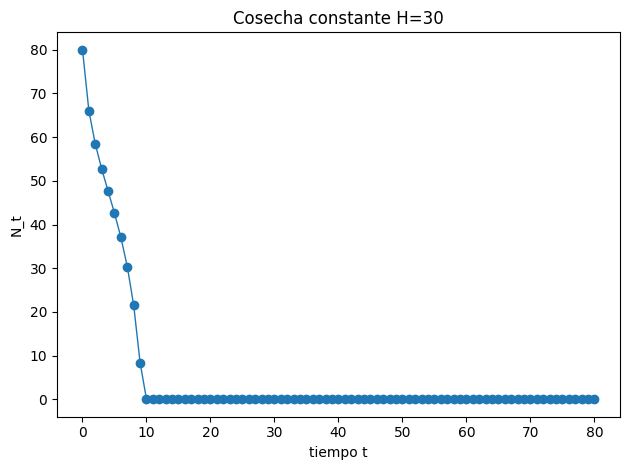

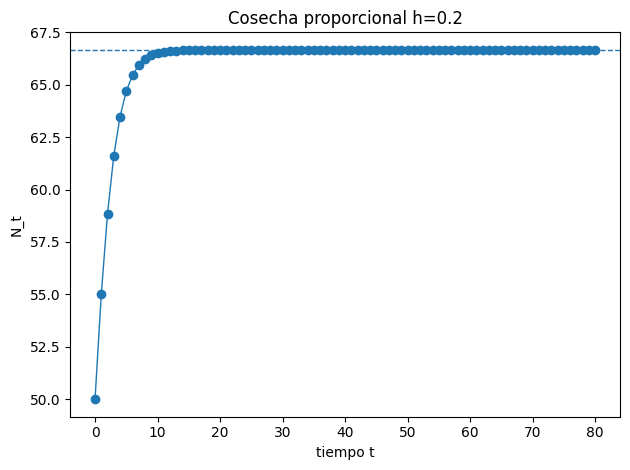

In [5]:
# Constante
for H in [10, 20, 30]:
    serie = iterar_dinamica(siguiente_pesca_cosecha_constante, x0=80, pasos=80, r=1.0, K=100, H=H)
    graficar_serie(serie, f"Cosecha constante H={H}", equilibrios=equilibrios_pesca_cosecha_constante(1.0, 100.0, H))

# Proporcional
serie_prop = iterar_dinamica(siguiente_pesca_cosecha_proporcional, x0=50, pasos=80, r=0.6, K=100, h=0.2)
graficar_serie(serie_prop, "Cosecha proporcional h=0.2", equilibrios=[equilibrio_pesca_cosecha_proporcional(0.6, 100.0, 0.2)])
